# 有限要素法のためのPython入門

## はじめに

PythonにはNumpy/Matplotlib/Scipy/Getfem++などのライブラリがあり、それらを組み合わせることにより容易に有限要素法のスクリプトを組むことができます。それぞれのライブラリに関しては各Wikipediaの内容を確認してください。

Numpy (https://ja.wikipedia.org/wiki/NumPy)

Matplotlib(https://ja.wikipedia.org/wiki/Matplotlib)

Scipy (https://ja.wikipedia.org/wiki/SciPy)

Getfem++ (https://ja.wikipedia.org/wiki/Getfem%2B%2B)

それぞれのモジュールはPythonでは以下のように呼び出します。

In [1]:
import numpy as np
import scipy as sp
import getfem as gf
import matplotlib.pyplot as plt
%matplotlib inline

## Numpyの学習

本節ではNumpyのチュートリアル

https://docs.scipy.org/doc/numpy-dev/user/quickstart.html

の内容を解説します。

このチュートリアルを読む前に、あなたは、Pythonのビットを知っている必要があります。 あなたがあなたの記憶をリフレッシュしたい場合、を見てみましょうPythonのチュートリアル 。

このチュートリアルの例を作業したい場合は、いくつかのソフトウェアがコンピュータにインストールされている必要があります。 参照してくださいhttp://scipy.org/install.html

### 基本
numpyのの主な目的は、均一な多次元配列です。 これは、正の整数のタプルによってインデックスを付け、要素（通常は数字）、同じタイプのすべてのテーブルです。 numpyのでは寸法が軸と呼ばれます。 軸の数はランクです。

それは一つの軸を有しているため、例えば、3次元空間内の点の座標[1、2、1]は 、ランク1の配列です。 その軸は、アレイ（これは2次元で）ランク2を持っている、以下の図の例では3の長さを有します。 一次元（軸）2の長さを有し、第二次元は3の長さを有します。

  [[1、0、0]、
  [0、1、2]]
numpyの配列のクラスはndarrayと呼ばれています。 また、エイリアスアレイによって知られています。 numpy.arrayは一次元配列を処理し、以下の機能を提供しています標準Pythonライブラリのクラスarray.array、同じではないことに注意してください。 ndarrayオブジェクトのより重要な属性は次のとおりです。

#### ndarray.ndim
軸数配列の（次元）。 Pythonの世界では、次元数は、 ランクと呼ばれます。

#### ndarray.shape
配列の次元。 これは、各次元に配列のサイズを表す整数の組です。 n行m列の行列については、 形状 （M、N）となります 。 形状タプルの長さは、したがって、ランク、または寸法​​、ndimの数です。

#### ndarray.size
配列の要素数の合計。 これは、 形状の要素の積に等しいです。

#### ndarray.dtype
配列の要素のタイプを記述するオブジェクト。 一つは、DTYPEの使用して、標準的なPythonの型を作成したり、指定することができます。 さらにnumpyのは、自身のタイプを提供します。 numpy.int32、numpy.int16、およびnumpy.float64はいくつかの例です。

#### ndarray.itemsize
配列の各要素のサイズ（バイト単位）。 たとえば、型のfloat64の要素の配列を持っているitemsize 8（= 64/8）、型complex32の一つがitemsize 4を有している（= 32/8）。 それはndarray.dtype.itemsizeに相当します。

#### ndarray.data
配列の実際の要素を含むバッファー。 通常、我々はインデックス作成機能を使用して配列の要素にアクセスするため、この属性を使用する必要はありません。

### 例

In [2]:
a = np.arange(15).reshape(3, 5)

In [3]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [4]:
a.shape

(3, 5)

In [5]:
a.ndim

2

In [6]:
a.dtype.name

'int64'

In [7]:
a.itemsize

8

In [8]:
a.size

15

In [9]:
type(a)

numpy.ndarray

In [10]:
b = np.array([6, 7, 8])

In [11]:
b

array([6, 7, 8])

In [12]:
type(b)

numpy.ndarray

### アレイの作成
配列を作成する方法はいくつかあります。

たとえば、 配列関数を使用して、通常のPythonリストやタプルから配列を作成することができます。 結果の配列の型は、配列中の要素の型から推定されます。

In [13]:
a = np.array([2,3,4])

In [14]:
a

array([2, 3, 4])

In [15]:
a.dtype

dtype('int64')

In [16]:
b = np.array([1.2, 3.5, 5.1])

In [17]:
b.dtype

dtype('float64')

頻繁にエラーが複数の数値引数に配列を呼び出すのではなく、引数として番号のリストを提供することにあります。

In [18]:
# a = np.array(1,2,3,4)  # 間違い
a = np.array([1,2,3,4])  # 正解

In [19]:
b = np.array([(1.5,2,3), (4,5,6)])
b


array([[ 1.5,  2. ,  3. ],
       [ 4. ,  5. ,  6. ]])

配列のタイプは、明示的に作成時に指定することができます。

In [20]:
c = np.array( [ [1,2], [3,4] ], dtype=complex )
c

array([[ 1.+0.j,  2.+0.j],
       [ 3.+0.j,  4.+0.j]])

多くの場合、配列の要素は、本来知られていないが、その大きさが知られています。 したがって、numpyのは、最初のプレースホルダのコンテンツを含む配列を作成するためにいくつかの機能を提供しています。 これらは、成長している配列の必要性、高価な操作を最小限に抑えます。

機能ゼロゼロの完全な配列を作成し、機能のものは、ものの完全な配列を作成し、機能の空は、その初期の内容にランダムであり、メモリの状態に依存する配列を作成します。 デフォルトでは、作成された配列のDTYPEはのfloat64です。

In [21]:
np.zeros( (3,4) )
np.ones( (2,3,4), dtype=np.int16 )                # dtype can also be specified
np.empty( (2,3) )                                 # uninitialized, output may vary

array([[  6.93118021e-310,   6.93118021e-310,   4.64680993e-317],
       [  6.93114845e-310,   1.39069238e-309,   1.39069238e-309]])

数字のシーケンスを作成するには、numpyのは、配列の代わりにリストを返す範囲に類似した機能を提供

In [22]:
np.arange( 10, 30, 5 )
np.arange( 0, 2, 0.3 )                 # it accepts float arguments

array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8])

arangeが浮動小数点引数で使用される場合、それが原因有限の浮動小数点精度まで、得られた要素の数を予測することは一般に不可能です。 このため、引数として私たちが望む要素の数、代わりのステップを受ける関数linspaceを使用する方が良いです。

In [23]:
from numpy import pi
np.linspace( 0, 2, 9 )                 # 9 numbers from 0 to 2

x = np.linspace( 0, 2*pi, 100 )        # useful to evaluate function at lots of points
f = np.sin(x)

参照してください。 
array , zeros , zeros_like , ones , ones_like , empty , empty_like , arange , linspace , numpy.random.rand , numpy.random.randn , fromfunction , fromfile

### 印刷配列

あなたは、配列を印刷するとき、numpyのは、ネストされたリストに似た方法でそれを表示しますが、次のようなレイアウトで：

* 最後の軸は、左から右に印刷されています
* 最後から2番目のは、上から下に印刷され、
* 残りは、空行で区切ら各スライスに、上から下に出力されます。

一次元配列は、その後、行、行列のリストのような行列やtridimensionalsなどbidimensionalsとして印刷されます。

In [24]:
a = np.arange(6)                         # 1d array
print(a)

b = np.arange(12).reshape(4,3)           # 2d array
print(b)

c = np.arange(24).reshape(2,3,4)         # 3d array
print(c)

[0 1 2 3 4 5]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


参照してください以下の リシェイプについてのより詳しい情報を得るために。

アレイは、印刷するには大きすぎる場合は、numpyのは、自動的に配列の中央部分をスキップし、角のみを出力します。

In [25]:
print(np.arange(10000))

print(np.arange(10000).reshape(100,100))

[   0    1    2 ..., 9997 9998 9999]
[[   0    1    2 ...,   97   98   99]
 [ 100  101  102 ...,  197  198  199]
 [ 200  201  202 ...,  297  298  299]
 ..., 
 [9700 9701 9702 ..., 9797 9798 9799]
 [9800 9801 9802 ..., 9897 9898 9899]
 [9900 9901 9902 ..., 9997 9998 9999]]


この動作を無効にして、配列全体を印刷するnumpyのを強制するには、set_printoptionsを使用して印刷オプションを変更することができます。

In [26]:
np.set_printoptions(threshold='nan')

### 基本操作

アレイ上の算術演算子は、 要素ごとに適用されます。 新しい配列が作成され、その結果が充填されています。

In [27]:
a = np.array( [20,30,40,50] )

多くの行列の言語とは異なり、製品演算子*は、numpyのアレイ内の要素ごとを運営しています。 行列積は 、ドット関数またはメソッドを使用して実施することができます。

In [28]:
b = np.arange( 4 )
b

array([0, 1, 2, 3])

In [29]:
c = a-b
c

array([20, 29, 38, 47])

In [30]:
b**2

array([0, 1, 4, 9])

In [31]:
10*np.sin(a)

array([ 9.12945251, -9.88031624,  7.4511316 , -2.62374854])

In [32]:
a<35

array([ True,  True, False, False], dtype=bool)

In [33]:
A = np.array( [[1,1],
            [0,1]] )
B = np.array( [[2,0],
            [3,4]] )

In [34]:
A*B                         # elementwise product

array([[2, 0],
       [0, 4]])

In [35]:
A.dot(B)                    # matrix product

array([[5, 4],
       [3, 4]])

In [36]:
np.dot(A, B)                # another matrix product

array([[5, 4],
       [3, 4]])

このような+ =や場所で* =、行為などの一部の操作では、既存の配列を変更するのではなく、新しいものを作成します。

In [37]:
a = np.ones((2,3), dtype=int)
b = np.random.random((2,3))
a *= 3
a

array([[3, 3, 3],
       [3, 3, 3]])

In [38]:
b += a
b

array([[ 3.05022092,  3.00465292,  3.76402564],
       [ 3.51447608,  3.83894774,  3.87847675]])

異なる型の配列で動作している場合、結果の配列の型は、より一般的または正確な1（アップキャストとして知られる動作）に相当します。

In [39]:
a = np.ones(3, dtype=np.int32)
b = np.linspace(0,pi,3)
b.dtype.name

'float64'

In [40]:
c = a+b
c

array([ 1.        ,  2.57079633,  4.14159265])

In [41]:
c.dtype.name

'float64'

In [42]:
d = np.exp(c*1j)
d

array([ 0.54030231+0.84147098j, -0.84147098+0.54030231j,
       -0.54030231-0.84147098j])

In [43]:
d.dtype.name

'complex128'

そのような配列のすべての要素の合計を計算などの多くの単項演算は、ndarrayクラスのメソッドとして実装されています。

それは関係なく、その形状の、番号のリストであるかのようにデフォルトでは、これらの操作は、アレイに適用されます。 しかし、 軸パラメータを指定することで、あなたは配列の指定した軸に沿って操作を適用することができます。

### ユニバーサル機能

numpyのは、罪、COS、およびEXPなどの使い慣れた数学関数を提供します。 numpyのでは、これらは「ユニバーサル機能」（ufunc）と呼ばれています。 numpyの中では、これらの機能は、出力として、配列を生成する、アレイ上の要素ごとに動作します。

参照してください。:

all , any , apply_along_axis , argmax , argmin , argsort , average , bincount , ceil , clip , conj , corrcoef , cov , cross , cumprod , cumsum , diff , dot , floor , inner , inv , lexsort , max , maximum , mean , median , min , minimum , nonzero , outer , prod , re , round , sort , std , sum , trace , transpose , var , vdot , vectorize , where

### インデックス、スライスと反復処理
一次元配列は、インデックス付きのスライスと同じよう、巡回できないリストや他のPythonシーケンス。

多次元配列は、軸ごとに一つのインデックスを持つことができます。 これらの指標は、カンマで区切られたタプルに記載されています：

少ないインデックスは軸の数より提供されている場合には、不足しているインデックスは、完全なスライスとみなされます。

残りの軸を表すために、必要に応じて：B [i]の中括弧内の式は、以下のように多くのインスタンスが続く私として扱われます。 numpyのは、また、bと 、この使用してドットを書き込むことができます[I、...]。

完全な索引付けタプルを生成するために必要なドット （...）は、のような多くのコロンを表します。 xはランク5アレイである場合たとえば、その後、（すなわち、それは5の軸があります）

* 、[：、：、1,2]×[1,2、...]は 、xと等価です

* X [...]、[3] xに[：、：、：、：、3]と

* X [4、...、5 ,:] xに[4、：、：、5 ,:]。

多次元配列の繰り返し処理は、最初の軸に対して行われます。

In [44]:
import numpy as np
a = np.array([[1.0, 2.0], [3.0, 4.0]])
print(a)

[[ 1.  2.]
 [ 3.  4.]]


1は、配列の各要素に対して操作を実行したい場合は、1があるフラット属性を使用することができますイテレータ配列のすべての要素の上に：

参照してください。 :

インデックス 、 インデックス （参照）、newaxis、ndenumerate、 インデックス

### 操作形状
#### アレイの形状を変化させる

配列には、各軸に沿った要素の数によって与えられた形状をしています：

配列の形状は、様々なコマンドを使用して変更できます。

ラヴェル（結果の配列内の要素の順序）は、通常は「Cスタイル」である、つまり、右端のインデックスが「最速を変更する」ので、[0,0]、[0,1]である要素の後に。 アレイは、他の形状に整形されている場合は、再び配列は「Cスタイル」として扱われます。 numpyのは、通常はこの順序で格納されている配列を作成するので、ラヴェル（）通常はその引数をコピーする必要はありませんが、配列を別の配列のスライスを取るか、異常なオプションを使用して作成することによって行われた場合、それをコピーする必要があるかもしれません。 関数）（ラヴェル）と（再形成も左端のインデックスは最速を変更するには、Fortran形式の配列を使用するために、オプションの引数を使用して、指示することができます。

リシェイプのに対し、関数は、変更された形でその引数を戻しndarray.resizeの方法は、配列自体を改変します。

ディメンションが再形成操作で-1として与えられている場合、他の寸法を自動的に計算されます。

##### 参照してください
ndarray.shape、 形を整え 、 サイズ変更 、 ラヴェル

### 異なるアレイを一緒にスタッキング

複数のアレイは異なる軸に沿って互いに積層することができます。

機能column_stack 2次元配列に列として1D配列をスタックします。 それはすることと等価であるvstackのみ1Dアレイに：

次元以上、との配列の場合hstack彼らの第二の軸に沿ってスタック、vstack彼らの最初の軸に沿ってスタック、およびCONCATENATEは連結が起こるはずそれに沿って軸の数を与えるオプションの引数を可能にします。

#### 注意

複雑なケースでは、 R_及びC_は、 1つの軸に沿って番号を積層してアレイを作成するために有用です。 彼らは範囲リテラルの使用を許可します（ "："）：

引数として配列を使用するとR_とC_に似てvstackとhstackデフォルトの動作ではなく、連結するために沿った軸の数を与えるオプションの引数を可能にします。

参照してください。 
hstack、vstack、column_stack、 連結 、C_、R_

### いくつかの小さなものにつのアレイを分割する

使用hsplitを 、あなたは、どちらか、またはその後の分割が発生した列を指定して返すように均等に形配列の数を指定することで、横軸に沿って配列を分割することができます：

vsplitは、垂直軸に沿って分割し、array_splitは 1がどの分割する軸に沿って指定することができます。

## コピーとビュー
動作し、配列を操作すると、そのデータは、時には新しい配列にコピーされ、時にはされていません。 これは多くの場合、初心者のための混乱の源です。 3つのケースがあります。

### まったくコピーしない

単純な割り当ては、配列オブジェクトまたはそのデータのないコピーを作成しません。

Pythonは参照として変更可能なオブジェクトを渡すので、関数呼び出しにはコピーを行いません。

### 表示または浅いコピー

異なる配列オブジェクトは、同じデータを共有することができます。 ビューの方法は、同じデータを見て、新しい配列オブジェクトを作成します。

配列をスライスすると、それのビューを返します。

### ディープコピー

コピー方法は、配列とそのデータの完全なコピーを作成します。

### 関数とメソッドの概要

ここでのカテゴリの注文いくつかの有用なnumpyの関数やメソッド名のリストです。 参照ルーチンを完全なリストについて。

#### アレイの作成
arange , array , copy , empty , empty_like , eye , fromfile , fromfunction , identity , linspace , logspace , mgrid , ogrid , ones , ones_like , r , zeros , zeros_like

#### 変換
ndarray.astype、atleast_1d、atleast_2d、atleast_3d、 マット

#### 操作
array_split , column_stack , concatenate , diagonal , dsplit , dstack , hsplit , hstack , ndarray.item , newaxis , ravel , repeat , reshape , resize , squeeze , swapaxes , take , transpose , vsplit , vstack


#### 質問
すべての 、 任意の 、 ゼロ以外 、 どこ

#### 注文
ARGMAX、argmin、argsort、 最大、最小 、PTP、searchsorted、 ソート

#### 事業
選択し 、 圧縮し 、cumprod、CUMSUM、 インナー 、ndarray.fill、IMAG、PROD、 置く 、PutMaskですです、本当の、合計

#### 基礎統計学
COV、 平均 、STD、VAR

#### 基本線形代数
クロス 、 ドット 、 アウター 、linalg.svd、 州交通省

## 少ない基本

### ルールの番組
放送は、普遍的な機能は全く同じ形状を有していない入力に有意義な方法で対処することができます。

放送の最初のルールは、すべての入力配列は、次元の数が同じでない場合は、すべての配列は、次元の数が同じになるまで、 "1"を繰り返し小さなアレイの形状の前に追加されるということです。

放送の二番目のルールは、特定のディメンションの行為に沿っ1の大きさの配列が、彼らはその次元に沿って最大の形状に配列のサイズを持っていたかのようにことを保証します。 配列要素の値は、「ブロードキャスト」アレイのその次元に沿って同じであると仮定されます。

放送ルールを適用した後、すべての配列のサイズが一致している必要があります。 詳細はで見つけることができる放送 。

## ファンシーインデックスとインデックストリック
numpyのは、通常のPython配列以上のインデックス作成の施設を提供しています。 我々の前に見たように、整数とスライスによってインデックス付けに加えて、配列は整数とブール値の配列の配列によってインデックス付けすることができます。

### インデックスの配列とインデックス

インデックス付きの配列 a が多次元である場合には、インデックスの単一のアレイは、最初の寸法を指します。 次の例では、パレットを使用してカラー画像にラベルの画像を変換することによって、この動作を示しています。

また、複数の次元のインデックスを与えることができます。 各次元のインデックスの配列は、同じ形状を有していなければなりません。

当然のことながら、私たちは順番にiとj を入れて （リストと言う）し、リストにインデックス付けを行うことができます。

しかし、我々は、この配列は、最初の次元をインデックスすると解釈されるため、配列にiとj を置くことによってこれを行うことはできません。

アレイとインデックス作成のもう一つの一般的な使用は、時間に依存する一連の最大値の検索です。

また、に割り当てる対象として配列とインデックス付けを使用することができます。

インデックスのリストが繰り返しが含まれている場合ただし、割り当ては最後の値を残し、数回行われます。

これは十分に合理的ですが、あなたはそれが何を期待しないこととして、Pythonの+ =構文を使用する場合は気をつけてください：

0は、インデックスのリストに2回出現するにもかかわらず、0番目の要素は一度だけインクリメントされます。 Pythonは「A = A + 1」に相当すると「+ = 1 A」を必要とするからです。

## ブール配列とインデックス

（整数）のインデックスの配列を持つ私たちのインデックス配列は我々が選択するインデックスのリストを提供しているとき。 ブール指標ではアプローチが異なります。 我々は明示的に私たちが望む、アレイ内のどの項目を選択し、我々はそうでないもの。

1ブールインデックス作成のための考えることができる最も自然な方法は、元の配列と同じ形状を持つブール配列を使用することです。

このプロパティは、割り当てに非常に役立ちます。

あなたはの画像を生成するブールインデクシングを使用する方法を参照するには、次の例を見ることができマンデルブロ集合を ：

ブール値を持つインデックス付けの第二の方法は、インデックス作成を整数に、より似ています。 配列の各次元のために私たちは私たちが望むのスライスを選択する1Dブール配列を与えます。

あなたがスライスしたい1Dブール配列の長さは寸法（または軸）の長さと一致しなければならないことに注意してください。 前の例では、B1は長さ3（ の行数）、および（長さ4の）B2と1ランクの配列の2番目のランク（列）インデックスに適しています。

### ix_（）関数
ix_の関数は、それぞれ次的なn-upletのための結果を得るために、異なるベクターを組み合わせて使用することができます。 たとえば、a、bおよびcベクトルの各々から採取した全てのトリプレットのすべてのA + B * Cを計算したい場合は：

また、次のように削減実現することができます。

し、それを次のように使用します。

通常のufunc.reduceに比べて減らすのこのバージョンの利点は、の使用にすることである放送ルールを引数配列出力回数ベクトルの数の大きさを作成しないようにするために。

### 文字列を含むインデックス
参照RecordArraysを 。

## 線形代数
進行中の作業。 ここに含まれるべき基本的な線形代数。


### 単純な配列の演算
進行中の作業。 ここに含まれるべき基本的な線形代数。

### 単純な配列の演算
多くのためnumpyのフォルダにlinalg.pyを参照してください。

## コツとヒント
ここでは短いと役立つヒントのリストを与えます。

## 「自動」リシェイプ

配列の次元を変更するには、自動的に推定されることでサイズのいずれかを省略することができます。

## ベクトルスタッキング

どのように我々は、同じサイズの行ベクトルのリストから2次元配列を作成しますか？ MATLABでは、これは非常に簡単です：xと yは、あなたが唯一のM = [X、Y]を行う必要があり、同じ長さの2つのベクトルである場合。 numpyのでは、この関数は積み重ねが行われるようになっている寸法に応じて、dstack、hstackとvstackを column_stack経由で動作します。 例えば：

以上の2次元でのそれらの機能の背後にあるロジックは、奇妙なことができます。

## ヒストグラム

numpyののヒストグラム配列のヒストグラムとビンのベクトル：配列に適用される関数は、ベクトルのペアを返します。注意してください：matplotlib のは、また、（と呼ばれるヒストグラムを構築するための機能を有しているHIST numpyの内の1つとは異なりMatlabののように、）。主な違いはということですpylab.histをしながら、自動的にヒストグラムをプロットnumpy.histogramが唯一のデータを生成します。

## 深い読み

* Pythonのチュートリアル
* numpyのリファレンス
* scipyのチュートリアル
* scipyの講義ノート
* MathWorks社のMATLAB、R、IDL、numpyの/ scipyの辞書

In [45]:
a.transpose()

array([[ 1.,  3.],
       [ 2.,  4.]])

In [46]:
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [47]:
u = np.eye(2) # unit 2x2 matrix; "eye" represents "I"
u

array([[ 1.,  0.],
       [ 0.,  1.]])

In [48]:
j = np.array([[0.0, -1.0], [1.0, 0.0]])
j

array([[ 0., -1.],
       [ 1.,  0.]])

In [49]:
np.dot (j, j) # matrix product

array([[-1.,  0.],
       [ 0., -1.]])

In [50]:
np.trace(u)

2.0

In [51]:
y = np.array([[5.], [7.]])
np.linalg.solve(a, y)

array([[-3.],
       [ 4.]])

In [52]:
np.linalg.eig(j)

(array([ 0.+1.j,  0.-1.j]),
 array([[ 0.70710678+0.j        ,  0.70710678-0.j        ],
        [ 0.00000000-0.70710678j,  0.00000000+0.70710678j]]))

In [53]:
np.linalg.eig?

In [54]:
a = np.arange(30)
a.shape = 2,-1,3  # -1 means "whatever is needed"
a.shape

(2, 5, 3)

In [55]:
a

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]],

       [[15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29]]])

In [56]:
x = np.arange(0,10,2)
x

array([0, 2, 4, 6, 8])

In [57]:
y = np.arange(5)
y

array([0, 1, 2, 3, 4])

In [58]:
m = np.vstack([x,y])
m

array([[0, 2, 4, 6, 8],
       [0, 1, 2, 3, 4]])

In [59]:
xy = np.hstack([x,y])
xy

array([0, 2, 4, 6, 8, 0, 1, 2, 3, 4])

In [60]:
a = np.arange(12).reshape(3,4)
b = a > 4
b                                          # b is a boolean with a's shape

array([[False, False, False, False],
       [False,  True,  True,  True],
       [ True,  True,  True,  True]], dtype=bool)

In [61]:
a[b]                                       # 1d array with the selected elements

array([ 5,  6,  7,  8,  9, 10, 11])

In [62]:
a[b] = 0                                   # All elements of 'a' higher than 4 become 0
a

array([[0, 1, 2, 3],
       [4, 0, 0, 0],
       [0, 0, 0, 0]])

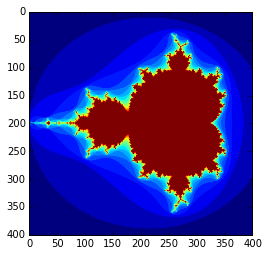

In [63]:
def mandelbrot( h,w, maxit=20 ):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)
    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2            # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much
    return divtime
plt.imshow(mandelbrot(400,400))
plt.show()

In [64]:
a = np.arange(12).reshape(3,4)
b1 = np.array([False,True,True])             # first dim selection
b2 = np.array([True,False,True,False])       # second dim selection

In [65]:
a[b1,:]                                   # selecting rows

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [66]:
a[b1]                                     # same thing

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [67]:
a[:,b2]                                   # selecting columns

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [68]:
a[b1,b2]                                  # a weird thing to do

array([ 4, 10])

In [69]:
a = np.array([2,3,4,5])
b = np.array([8,5,4])
c = np.array([5,4,6,8,3])
ax,bx,cx = np.ix_(a,b,c)
ax

array([[[2]],

       [[3]],

       [[4]],

       [[5]]])

In [70]:
bx

array([[[8],
        [5],
        [4]]])

In [71]:
cx

array([[[5, 4, 6, 8, 3]]])

In [72]:
ax.shape, bx.shape, cx.shape

((4, 1, 1), (1, 3, 1), (1, 1, 5))

In [73]:
result = ax+bx*cx
result

array([[[42, 34, 50, 66, 26],
        [27, 22, 32, 42, 17],
        [22, 18, 26, 34, 14]],

       [[43, 35, 51, 67, 27],
        [28, 23, 33, 43, 18],
        [23, 19, 27, 35, 15]],

       [[44, 36, 52, 68, 28],
        [29, 24, 34, 44, 19],
        [24, 20, 28, 36, 16]],

       [[45, 37, 53, 69, 29],
        [30, 25, 35, 45, 20],
        [25, 21, 29, 37, 17]]])

In [74]:
result[3,2,4]

17

In [75]:
a[3]+b[2]*c[4]

17

In [76]:
def ufunc_reduce(ufct, *vectors):
    vs = np.ix_(*vectors)
    r = ufct.identity
    for v in vs:
        r = ufct(r,v)
    return r

In [77]:
ufunc_reduce(np.add,a,b,c)

array([[[15, 14, 16, 18, 13],
        [12, 11, 13, 15, 10],
        [11, 10, 12, 14,  9]],

       [[16, 15, 17, 19, 14],
        [13, 12, 14, 16, 11],
        [12, 11, 13, 15, 10]],

       [[17, 16, 18, 20, 15],
        [14, 13, 15, 17, 12],
        [13, 12, 14, 16, 11]],

       [[18, 17, 19, 21, 16],
        [15, 14, 16, 18, 13],
        [14, 13, 15, 17, 12]]])

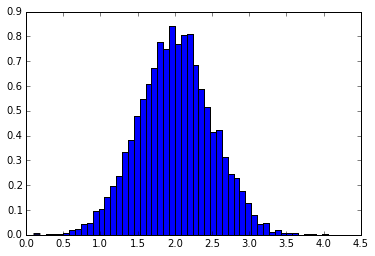

In [78]:
# Build a vector of 10000 normal deviates with variance 0.5^2 and mean 2
mu, sigma = 2, 0.5
v = np.random.normal(mu,sigma,10000)
# Plot a normalized histogram with 50 bins
plt.hist(v, bins=50, normed=1)       # matplotlib version (plot)
plt.show()

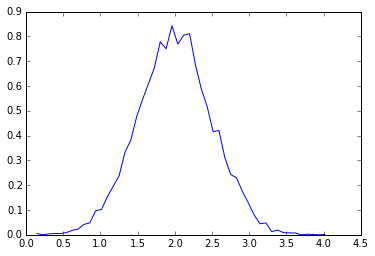

In [79]:
# Compute the histogram with numpy and then plot it
(n, bins) = np.histogram(v, bins=50, normed=True)  # NumPy version (no plot)
plt.plot(.5*(bins[1:]+bins[:-1]), n)
plt.show()

## Getfem++の学習
本節ではGetfem++のチュートリアル

http://download.gna.org/getfem/html/homepage/tutorial/index.html

の内容を解析します。

## Scipyの学習

ScipyはNumPyを基盤にした科学計算ライブラリです。本節ではScipyのチュートリアル

http://docs.scipy.org/doc/scipy/reference/tutorial/

の内容のうち、線形代数関係のライブラリの説明をします。

### はじめに

scipyのが最適化されたATLAS LAPACKとBLASライブラリを使用して構築されている場合、それは非常に高速な線形代数機能を備えています。あなたは十分な深さを掘る場合は、生のLAPACKとBLASライブラリのすべてはさらにスピードをご使用できます。このセクションでは、これらのルーチンのいくつかの使いやすいインターフェイスが記載されています。

これらの線形代数ルーチンのすべては、2次元配列に変換することができるオブジェクトを期待します。これらのルーチンの出力は、2次元配列です。

### 基本的なライブラリの紹介

#### 逆行列の計算

行列$\boldsymbol{A}$の逆行列$\boldsymbol{B}$($\boldsymbol{A}\boldsymbol{B}=\boldsymbol{I}$ただし、$\boldsymbol{I}$は単位行列)を考えます。通常$\boldsymbol{B}$は$\boldsymbol{A}^{-1}$と表現されます。Scipyでは配列$\boldsymbol{A}$の逆行列はlinalg.inv(A)と入力するかA.Iと入力することで計算可能です。例えば、

$\mathbf{A} = \left[\begin{array}{ccc} 1 & 3 & 5\\ 2 & 5 & 1\\ 2 & 3 & 8\end{array}\right]$

の逆行列を計算してみます。

$\mathbf{A^{-1}} = \frac{1}{25}
        \left[\begin{array}{ccc} -37 & 9 & 22 \\ 
                                  14 & 2 & -9 \\ 
                                  4 & -3 & 1
              \end{array}\right] = %
         \left[\begin{array}{ccc} -1.48 & 0.36 & 0.88  \\
                                   0.56 & 0.08 & -0.36 \\
                                   0.16 & -0.12 & 0.04
               \end{array}\right]$

これをScipyで計算すると次のようになります。

In [ ]:
import numpy as np
from scipy import linalg

A = np.array([[1,3,5],[2,5,1],[2,3,8]])

In [6]:
A

array([[1, 3, 5],
       [2, 5, 1],
       [2, 3, 8]])

In [7]:
linalg.inv(A)

array([[-1.48,  0.36,  0.88],
       [ 0.56,  0.08, -0.36],
       [ 0.16, -0.12,  0.04]])

In [8]:
A.dot(linalg.inv(A))

array([[  1.00000000e+00,  -1.11022302e-16,  -5.55111512e-17],
       [  3.05311332e-16,   1.00000000e+00,   1.87350135e-16],
       [  2.22044605e-16,  -1.11022302e-16,   1.00000000e+00]])

In [80]:
from scipy.sparse import csr_matrix
A = csr_matrix([[1, 2, 0], [0, 0, 3], [4, 0, 5]])
v = np.array([1, 0, -1])
A.dot(v)

array([ 1, -3, -1])

In [81]:
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve
from numpy.linalg import solve, norm
from numpy.random import rand

In [82]:
A = lil_matrix((1000, 1000))
A[0, :100] = rand(100)
A[1, 100:200] = A[0, :100]
A.setdiag(rand(1000))

In [83]:
A = A.tocsr()
b = rand(1000)
x = spsolve(A, b)

In [84]:
x_ = solve(A.toarray(), b)

In [85]:
err = norm(x-x_)
err < 1e-10

True

In [86]:
from scipy import sparse
from numpy import array
I = array([0,3,1,0])
J = array([0,3,1,2])
V = array([4,5,7,9])
A = sparse.coo_matrix((V,(I,J)),shape=(4,4))
print A

  (0, 0)	4
  (3, 3)	5
  (1, 1)	7
  (0, 2)	9


In [87]:
I = array([0,0,1,3,1,0,0])
J = array([0,2,1,3,1,0,0])
V = array([1,1,1,1,1,1,1])
B = sparse.coo_matrix((V,(I,J)),shape=(4,4)).tocsr()
print B

  (0, 0)	3
  (0, 2)	1
  (1, 1)	2
  (3, 3)	1


In [88]:
G_dense = np.array([[0, 2, 1],
                    [2, 0, 0],
                    [1, 0, 1]])
G_masked = np.ma.masked_values(G_dense, 0)
from scipy.sparse import csr_matrix
G_sparse = csr_matrix(G_dense)
print G_sparse

  (0, 1)	2
  (0, 2)	1
  (1, 0)	2
  (2, 0)	1
  (2, 2)	1


In [89]:
from scipy.sparse import linalg

In [90]:
A = A.tocsc()

In [91]:
B = B.tocsc()

In [92]:
m = gf.Mesh?

In [ ]:
m = gf.Mesh

In [93]:
m = gf.Mesh

In [94]:
m = gf.Mesh

In [95]:
m = gf.Mesh

In [96]:
m = gf.Mesh

In [97]:
m = gf.Mesh

In [98]:
m = gf.Mesh

In [99]:
m = gf.Mesh('cartesian', np.arange(10))

In [100]:
print m


BEGIN POINTS LIST

  POINT  0  0
  POINT  1  1
  POINT  2  2
  POINT  3  3
  POINT  4  4
  POINT  5  5
  POINT  6  6
  POINT  7  7
  POINT  8  8
  POINT  9  9

END POINTS LIST



BEGIN MESH STRUCTURE DESCRIPTION

CONVEX 0    'GT_PK(1,1)'      0  1
CONVEX 1    'GT_PK(1,1)'      1  2
CONVEX 2    'GT_PK(1,1)'      2  3
CONVEX 3    'GT_PK(1,1)'      3  4
CONVEX 4    'GT_PK(1,1)'      4  5
CONVEX 5    'GT_PK(1,1)'      5  6
CONVEX 6    'GT_PK(1,1)'      6  7
CONVEX 7    'GT_PK(1,1)'      7  8
CONVEX 8    'GT_PK(1,1)'      8  9

END MESH STRUCTURE DESCRIPTION



In [101]:
mfu = gf.MeshFem(m)

In [102]:
print mfu


BEGIN MESH_FEM

QDIM 1
 BEGIN DOF_ENUMERATION 
 END DOF_ENUMERATION 
END MESH_FEM



In [103]:
mfu.set_fem(gf.Fem('FEM_PK(1,1)'))

In [104]:
print mfu


BEGIN MESH_FEM

QDIM 1
 CONVEX 0 'FEM_PK(1,1)'
 CONVEX 1 'FEM_PK(1,1)'
 CONVEX 2 'FEM_PK(1,1)'
 CONVEX 3 'FEM_PK(1,1)'
 CONVEX 4 'FEM_PK(1,1)'
 CONVEX 5 'FEM_PK(1,1)'
 CONVEX 6 'FEM_PK(1,1)'
 CONVEX 7 'FEM_PK(1,1)'
 CONVEX 8 'FEM_PK(1,1)'
 BEGIN DOF_ENUMERATION 
  0:  0 1
  1:  1 2
  2:  2 3
  3:  3 4
  4:  4 5
  5:  5 6
  6:  6 7
  7:  7 8
  8:  8 9
 END DOF_ENUMERATION 
END MESH_FEM



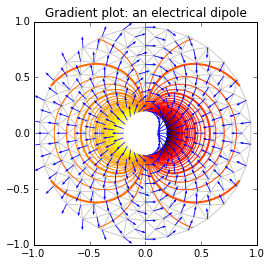

In [105]:
"""
Demonstrates computation of gradient with matplotlib.tri.CubicTriInterpolator.
"""
from matplotlib.tri import Triangulation, UniformTriRefiner,\
    CubicTriInterpolator
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import math
%matplotlib inline


#-----------------------------------------------------------------------------
# Electrical potential of a dipole
#-----------------------------------------------------------------------------
def dipole_potential(x, y):
    """ The electric dipole potential V """
    r_sq = x**2 + y**2
    theta = np.arctan2(y, x)
    z = np.cos(theta)/r_sq
    return (np.max(z) - z) / (np.max(z) - np.min(z))


#-----------------------------------------------------------------------------
# Creating a Triangulation
#-----------------------------------------------------------------------------
# First create the x and y coordinates of the points.
n_angles = 30
n_radii = 10
min_radius = 0.2
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2*math.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += math.pi/n_angles

x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
V = dipole_potential(x, y)

# Create the Triangulation; no triangles specified so Delaunay triangulation
# created.
triang = Triangulation(x, y)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = np.where(xmid*xmid + ymid*ymid < min_radius*min_radius, 1, 0)
triang.set_mask(mask)

#-----------------------------------------------------------------------------
# Refine data - interpolates the electrical potential V
#-----------------------------------------------------------------------------
refiner = UniformTriRefiner(triang)
tri_refi, z_test_refi = refiner.refine_field(V, subdiv=3)

#-----------------------------------------------------------------------------
# Computes the electrical field (Ex, Ey) as gradient of electrical potential
#-----------------------------------------------------------------------------
tci = CubicTriInterpolator(triang, -V)
# Gradient requested here at the mesh nodes but could be anywhere else:
(Ex, Ey) = tci.gradient(triang.x, triang.y)
E_norm = np.sqrt(Ex**2 + Ey**2)

#-----------------------------------------------------------------------------
# Plot the triangulation, the potential iso-contours and the vector field
#-----------------------------------------------------------------------------
plt.figure()
plt.gca().set_aspect('equal')
plt.triplot(triang, color='0.8')

levels = np.arange(0., 1., 0.01)
cmap = cm.get_cmap(name='hot', lut=None)
plt.tricontour(tri_refi, z_test_refi, levels=levels, cmap=cmap,
               linewidths=[2.0, 1.0, 1.0, 1.0])
# Plots direction of the electrical vector field
plt.quiver(triang.x, triang.y, Ex/E_norm, Ey/E_norm,
           units='xy', scale=10., zorder=3, color='blue',
           width=0.007, headwidth=3., headlength=4.)

plt.title('Gradient plot: an electrical dipole')
plt.show()


In [106]:
from tempfile import NamedTemporaryFile
from IPython.display import HTML

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

In [ ]:
import pylab as plt
import numpy as np
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

# call our new function to display the animation
display_animation(anim)

In [ ]:
# -*- coding: UTF-8 -*-
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

fig = plt.figure()

ims = []
for i in range(720):
    rad = math.radians(i)
    im = plt.scatter(math.cos(rad), math.sin(rad))
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=1, repeat_delay=1000)

display_animation(ani)